# Fed Interest Rate Simulation using the Hull-White Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter as ff
from scipy.stats import gaussian_kde
%matplotlib inline

In [3]:
def hull_white_one_factor(r0, a, sigma, t, f):
    
    N = t.shape[0]
    e = np.zeros(N)
    v = np.zeros(N)
    r = np.ones(N) * r0
    alpha = f + sigma**2/(2*a**2)*(1-np.exp(-a*t))**2
    
    rates = []
    
    rates.insert(0,r0)
    
    for i in range(1, N):
        dt = t[i] - t[i-1]
        e[i] = r[i-1] * np.exp(-a*dt) + alpha[i] - alpha[i-1] * np.exp(-a*dt)
        v[i] = sigma**2/(2*a) * (1 - np.exp(-2*a*dt))
        rates.insert(i, np.random.normal(e[i], np.sqrt(v[i])))
        
#         dict = {'Time' : t, 'Interest Rate' : r}

#     interest_rate_simulation = pd.DataFrame.from_dict(data = dict)
#     interest_rate_simulation.set_index('Time', inplace = True)
#     return interest_rate_simulation
    return (rates, alpha)

$$ E\{r(t) | F_s\} = r(s)e^{-a(t-s)} + \alpha(t) - \alpha(s)e^{-a(t-s)} $$ $$ Var\{ r(t) | F_s \} = \frac{\sigma^2}{2a} [1 - e^{-2a(t-s)}] $$ where $$ \alpha(t) = f^M(0, t) + \frac{\sigma^2} {2a^2}(1-e^{-at})^2$$

In [5]:
T = 10                                # Total no. of years
t = np.arange(1,T*12+2)               # time steps
f = 0.159          # Forward rate
forwards = f*np.ones(121)
sigma = 0.02
a = 0.0717
r0 = 0.055
M = 10000
N = 120

# Initializing an array to store the calculated interest rates
rates_out = []
hw_rates = []
alpha = []

for i in range(M):
    r = hull_white_one_factor(r0, a, sigma, t, forwards)
    rates_out.append(r)
    hw_rates.append(rates_out[i][0])
    alpha.append(rates_out[i][1])

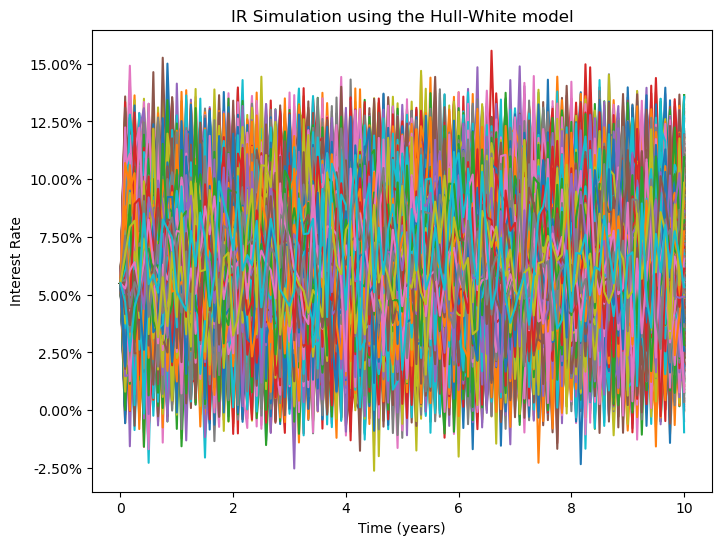

In [6]:
plt.figure(figsize=(8,6))

for rate in hw_rates:
    plt.plot(np.linspace(0,T,N+1),rate)
    plt.xlabel('Time (years)')
    plt.ylabel('Interest Rate')
    plt.title('IR Simulation using the Hull-White model')
    

# Function to format y-axis values to percentages
def to_percent(y, _):
    return f'{y * 100:.2f}%'

# Applying the percentage formatting to y-axis ticks
plt.gca().yaxis.set_major_formatter(ff(to_percent))

plt.show()

Text(0.5, 1.0, 'Theta curve')

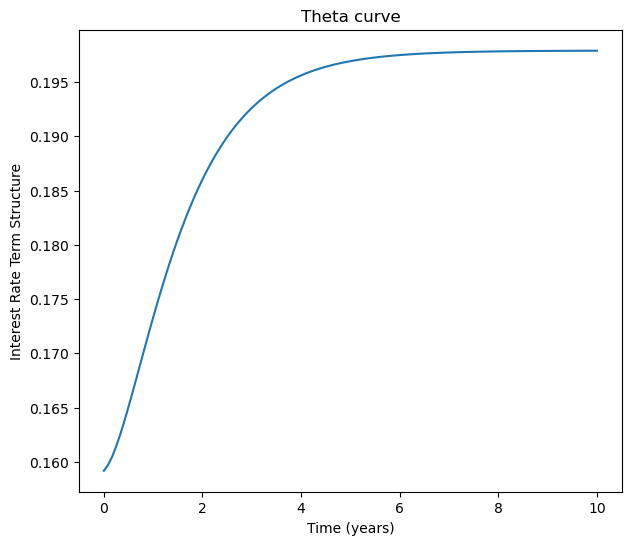

In [7]:
plt.figure(figsize=(7,6))

# for i in alpha:
#     plt.plot(np.linspace(0,T,N+1),i)
#     plt.xlabel('Time (years)')
#     plt.ylabel('Interest Rate')
#     plt.title('Theta curve')
    
plt.plot(np.linspace(0,T,N+1),alpha[1])
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate Term Structure')
plt.title('Theta curve')

In [8]:
hw_rates_mean = np.mean(hw_rates)
hw_rates_mean

0.06465355118055044

In [9]:
yr_1_rates = []

# for i in range(M):
#     yr_1_rates.append(hw_rates[i][:12])
    
for i in range(M):
    yr_1_rates.append(hw_rates[i][11])

yr_1_rates

[0.08947045248725805,
 0.042829791531040946,
 0.06453752673550603,
 0.0668168249000883,
 0.08586280560378272,
 0.06406325615058474,
 0.09172511390346792,
 0.09215314304703968,
 0.07536329031368262,
 0.09685306113778518,
 0.05133089473534005,
 0.08289683312232646,
 0.02303933532897077,
 0.05159403862993659,
 0.03217893096672922,
 0.07871391969961718,
 0.07130076559053804,
 0.09429281423441423,
 0.10989596296456369,
 0.06760353922158757,
 0.06212360373604898,
 0.08276552601974121,
 0.05871568245213529,
 0.07987240492470252,
 0.07497754071424069,
 0.05814449948611489,
 0.032831251667788865,
 0.07033570017639534,
 0.05619641710809612,
 0.05567886607118829,
 0.1062440846342985,
 0.03871535599778412,
 0.05594301943857288,
 0.038944394522849354,
 0.03933600049516875,
 0.06484574884064528,
 0.0700649880669823,
 0.05738067863893693,
 0.07143848941070834,
 0.07346190157292462,
 0.08034370828559498,
 0.043233327378289804,
 0.07369267224340507,
 0.04413619108900211,
 0.06981555067142292,
 0.108349

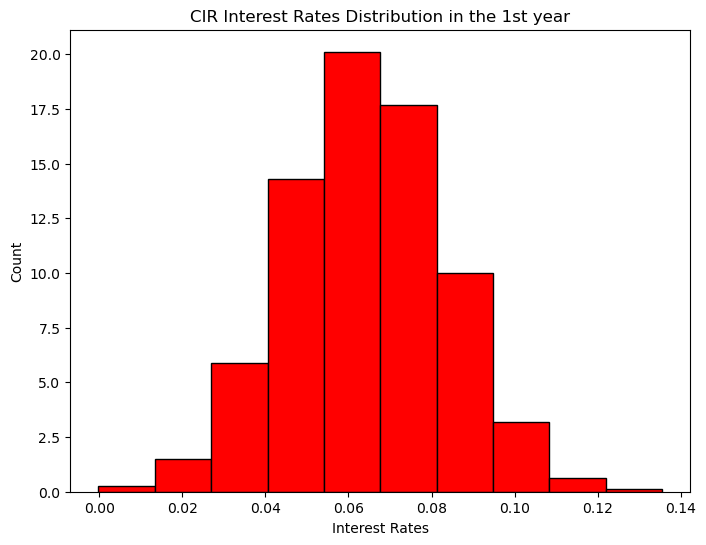

In [10]:
# Plotting the histogram
plt.figure(figsize=(8,6))

plt.hist(yr_1_rates, bins=10, color='red', edgecolor='black', density=True)

# Adding labels and title
plt.xlabel('Interest Rates')
plt.ylabel('Count')
plt.title('CIR Interest Rates Distribution in the 1st year')

# # Setting y-axis ticks to represent percentiles
# plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in plt.gca().get_yticks()])

# Show plot
plt.show()

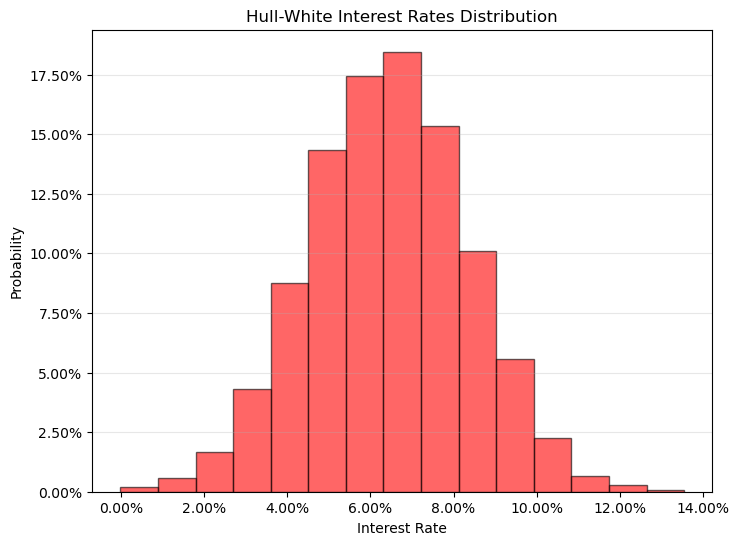

In [11]:
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# Assuming Benchmark_difference is a pandas Series or a NumPy array
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the histogram on the primary y-axis
counts, bins, _ = ax1.hist(yr_1_rates, bins=15, alpha=0.6, color='red', edgecolor='black', label='Histogram')
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Probability')
plt.title('Hull-White Interest Rates Distribution')
ax1.grid(axis='y', alpha=0.3)

# Customize y-axis labels to display percentages for the histogram
def to_percentage(y, _):
    y_new = y/100
    return f"{y_new:.2f}%"

ax1.yaxis.set_major_formatter(FuncFormatter(to_percentage))

def to_percentage_x(x, _):
    return f"{x*100:.2f}%"

ax1.xaxis.set_major_formatter(FuncFormatter(to_percentage_x))

plt.show()

In [12]:
mean_rate = np.mean(yr_1_rates)
std_dev = np.std(yr_1_rates)

In [13]:
print(mean_rate)
print(std_dev)

0.06434467595948114
0.019060743081920843
